### Distribution Analysis

Distribution analysis is a key step in data exploration, helping you understand how data points are spread across a range of values.

**Visual Inspection**
- **Histograms**: Create histograms to see the frequency of different values. Look for patterns like skewness, modality, and outliers.
- **Box Plots**: Use box plots to visualize the median, quartiles, and outliers. This helps identify the spread and central tendency of the data.
- **KDE Plots**: Kernel Density Estimation plots provide a smoothed representation of the probability density function. They can reveal the shape and peaks of the distribution.

**Statistical Measures**
- **Mean and Median**: Calculate the mean (average) and median (middle value) to understand the central tendency.
- **Standard Deviation and Variance**: Measure the spread of the data. A high standard deviation indicates a wider spread.
- **Skewness**: Determine the skewness of the distribution. A positive skew means the tail on the right side is longer, while a negative skew means the tail on the left side is longer.
- **Kurtosis**: Measure the "tailedness" of the distribution. A high kurtosis indicates a heavy-tailed distribution with more extreme values.

**Common Distributions**

- **Normal Distribution (Gaussian)**: Symmetrical bell-shaped curve.
- **Uniform Distribution**: All values have equal probability.
- **Poisson Distribution**: Commonly used for count data (e.g., number of occurrences in a fixed interval).
- **Binomial Distribution**: Represents the number of successes in a fixed number of Bernoulli trials.
- **Exponential Distribution**: Often used for modeling waiting times or interarrival times.
- **Log-normal Distribution**: Useful for modeling variables that are log-normally distributed.


*Features to analyze* 
- Fwd IAT Total 
- Bwd IAT Total
- Fwd Header Length 
- Bwd Header Length
- Down/up Ratio 
- Average Packet Size 
- Fwd Bytes/Bulk avg 
- Fwd Packet/Bulk avg 
- Total TCP Flow time
---

In [1]:
# Importing important libraries 
import pandas as pd 
import numpy as np
import os 
import json

import matplotlib.pyplot as plt
import seaborn as sns

**Functions**

In [2]:
def read_data(data_path: str, usecols: list) -> pd.DataFrame:
    """
    This function reads the data from the data path
    """
    data = pd.read_csv(data_path, usecols=usecols)
    return data


def save_plot(folder_name: str, file_name: str):
    """
    This function saves the plot
    """
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
    
    try:    
        plt.savefig(os.path.join(folder_name, file_name))
        print("Fig saved successfully!")
    except:
        print("Error in saving the figure")

    
def kde_plot(data: pd.DataFrame, feature_name: str, save: bool, fig_size: tuple = (8, 4),
             hue: str = 'Label', fill: bool = True, palette: str = 'crest'): 
    """
    This function plots a kernel density estimation plot for distribution analysis
    """
    plt.figure(figsize=fig_size)
    # Kde plot 
    sns.kdeplot(
        data = data,
        x = feature_name, 
        hue = hue,
        fill = fill,
        common_norm = False,
        palette = palette
    )
    plt.title(f"Kernel Density Estimation Plot for {feature_name}")

    # Save plot
    if save:
        folder_name = 'kde_plots'
        file_name = f'{feature_name.strip()}_kde.png'   
        save_plot(folder_name, file_name)

    plt.show()


def remove_outliers(data: pd.DataFrame, feature_name: str):
    """
    This function removes the outliers from the data
    """ 
    p75 = data[feature_name].quantile(0.75)

    filtered_data = data[data[feature_name] <= p75]

    return filtered_data

# ... 

**Data**

In [8]:
# Read data from filepath 
# This file path is for temporary usage (For EDA)
# It will be removed once the task is completed 

file_path = "dataset.csv"
# Columns in this category
columns_to_read = ['Fwd IAT Total', 'Bwd IAT Total', 'Fwd Header Length', 'Bwd Header Length', 'Down/Up Ratio', 
        'Average Packet Size', 'Fwd Bytes/Bulk Avg', 'Fwd Packet/Bulk Avg', 'Total TCP Flow Time', 'Label']

# Read the data
try:
    data = read_data(file_path, usecols = columns_to_read)
    print(f"Successfully read {len(data.columns)} features")
except:
    print("File not found!")
    print("[INFO] Please place the dataset.csv in the directory for use!")

Successfully read 10 features


**Analysis**

### **KDE Plot**

KDE plots can be a valuable tool for identifying the underlying probability distribution of your data.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231475 entries, 0 to 3231474
Data columns (total 9 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Fwd IAT Total        float64
 1   Bwd IAT Total        float64
 2   Fwd Header Length    int64  
 3   Bwd Header Length    int64  
 4   Down/Up Ratio        float64
 5   Average Packet Size  float64
 6   Fwd Bytes/Bulk Avg   int64  
 7   Fwd Packet/Bulk Avg  int64  
 8   Total TCP Flow Time  int64  
dtypes: float64(4), int64(5)
memory usage: 221.9 MB


Fig saved successfully!


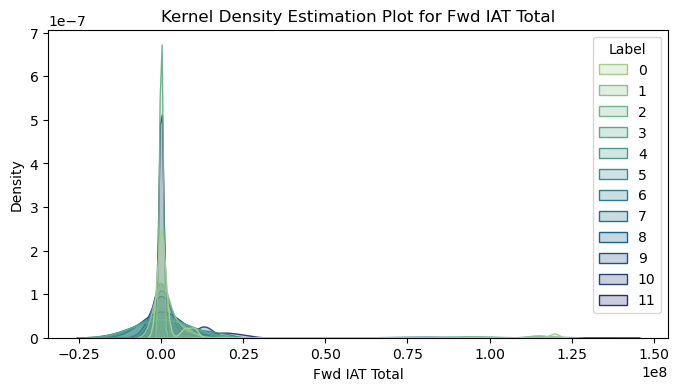

In [10]:
kde_plot(data=data, feature_name='Fwd IAT Total', save=True)

> Forward Inter-arrival time shows multi-modal distribution with multiple peaks (modes) in label 0,1 and 2

> Presence of outliers: the plot has outliers which indicate that there are some high fwd inter-arrival time for certain labels 

Fig saved successfully!


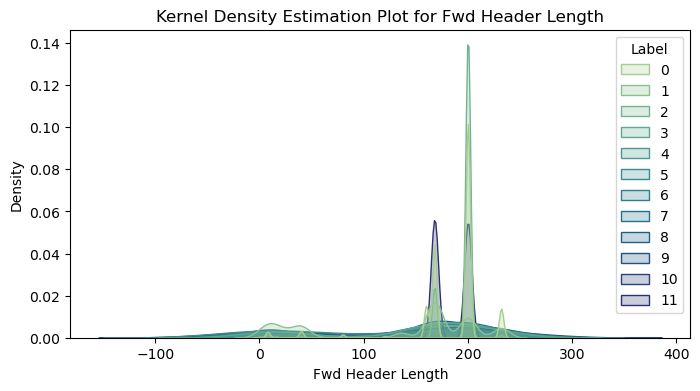

In [16]:
f_data = remove_outliers(data=data, feature_name='Fwd Header Length')
kde_plot(data=f_data, feature_name='Fwd Header Length', save=True)

> Data shows multiple peaks and non-uniform distribution, particularly across the higher labels. 

> Long tailed distribution: Shows rightward skew with a long tail which indicate there are many instances which are far away from mean of the data.

> Grouping: The plot shows potential clusters across certain Header lengths.

Fig saved successfully!


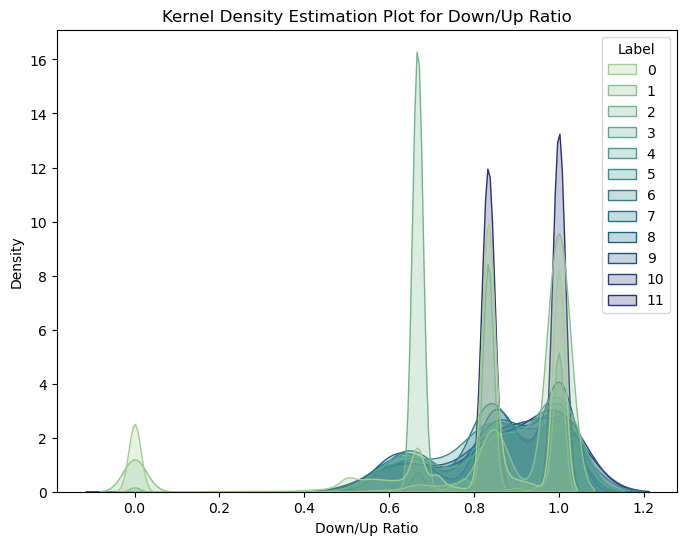

In [19]:
f_data = remove_outliers(data, 'Down/Up Ratio')
plt.figure(figsize=(8, 6))
# Kde plot 
sns.kdeplot(
    data = f_data,
    x = 'Down/Up Ratio', 
    hue = 'Label',
    fill = True,
    common_norm = False,
    palette = 'crest'
)
plt.title(f"Kernel Density Estimation Plot for Down/Up Ratio")

save = True # set false if dont want to save
# Save plot
if save:
    folder_name = 'kde_plots'
    file_name = f'DownUpRatio_kde.png'   
    save_plot(folder_name, file_name)

plt.show()

> Class Separation: The distinct peaks and overlapping regions suggest that the Down/Up Ratio feature might be useful for distinguishing between certain classes

> Data concentration: The data shows concentration of data with presence of some outliers close to 0

> Multiple peaks at certain Down/Up Ratios indicate clusters 

Fig saved successfully!


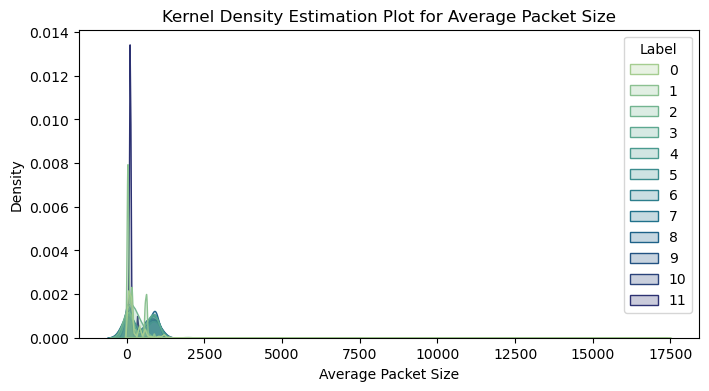

In [22]:
kde_plot(data=f_data, feature_name='Average Packet Size', save=True)

> Most of the packet size are close to 0 wih multiple modes.

> Presence of outliers, need to be treated or handled further

Fig saved successfully!


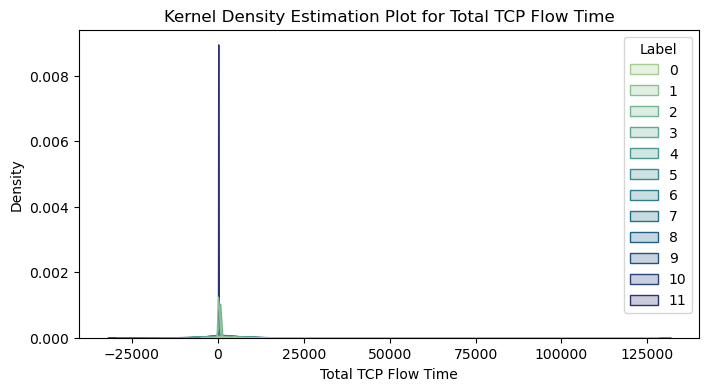

In [33]:
kde_plot(remove_outliers(data, 'Total TCP Flow Time'), 'Total TCP Flow Time', save=True)

> Highly concentrated near 0, indicates that Total TCP Flow Time was very less for most of the flow.

> Presence of outliers, need to be carefully treated further